## Classification
### KNN

In [65]:
import pandas as pd
df=pd.read_csv("telecust1000t.csv")
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [67]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [68]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
y=df["custcat"]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)



In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

mypipeline=Pipeline([('normal',MinMaxScaler()),('model',DecisionTreeClassifier(random_state=43))])

In [71]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
mypipeline.fit(X_train,y_train)

Pipeline(steps=[('normal', MinMaxScaler()),
                ('model', DecisionTreeClassifier(random_state=43))])

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
y_test_=mypipeline.predict(X_test)
y_test_prob=mypipeline.predict_proba(X_test)
accuracy_score(y_test,y_test_)
log_loss(y_test,y_test_prob)

24.149247770708488

In [74]:
df=pd.read_csv("drug200.csv")
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [75]:
df.info()
X=df[['Age',  'BP', 'Cholesterol', 'Na_to_K']]
y=df['Drug']
cat1=['BP','Cholesterol']
cat2=[['Sex']]
num=['Age','Na_to_K']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [76]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=.2,random_state=52)

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
Preprocess=ColumnTransformer([
    ('num',MinMaxScaler(),num),
    #('cat1',OrdinalEncoder(categories=['LOW',"NORMAL",'HIGH']),cat1)
    ('cat1',LabelEncoder(),cat1)
])

In [78]:
model=DecisionTreeClassifier()
mypipeline=Pipeline(steps=[('preprocess',Preprocess),('model',model)])


In [79]:
train_X.shape,train_y.shape

((160, 4), (160,))

In [80]:
mypipeline.fit(train_X,train_y)

TypeError: LabelEncoder.fit_transform() takes 2 positional arguments but 3 were given

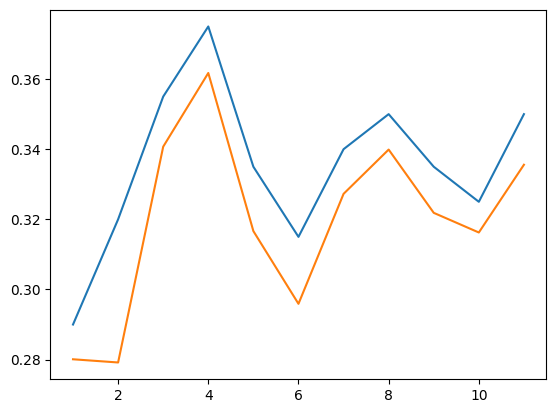

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,12),accuracies)
plt.plot(range(1,12),f1)


In [ ]:
y_test_prob

array([[0. , 0.4, 0.4, 0.2],
       [0.2, 0.6, 0. , 0.2],
       [0. , 0.2, 0.6, 0.2],
       [0. , 0.4, 0.6, 0. ],
       [0. , 0.2, 0.6, 0.2],
       [0.2, 0. , 0.6, 0.2],
       [0.2, 0.2, 0.2, 0.4],
       [0. , 0.2, 0.6, 0.2],
       [0.8, 0. , 0. , 0.2],
       [0.2, 0.2, 0. , 0.6],
       [0.2, 0.8, 0. , 0. ],
       [0.2, 0.2, 0.4, 0.2],
       [0.2, 0. , 0. , 0.8],
       [0.4, 0.2, 0.4, 0. ],
       [0.6, 0. , 0.2, 0.2],
       [0.4, 0.4, 0. , 0.2],
       [0. , 0.2, 0. , 0.8],
       [0.4, 0. , 0.2, 0.4],
       [0.4, 0.6, 0. , 0. ],
       [0.2, 0.2, 0.2, 0.4],
       [0.8, 0. , 0. , 0.2],
       [0.4, 0.2, 0.4, 0. ],
       [0.4, 0. , 0.6, 0. ],
       [0. , 0.2, 0.6, 0.2],
       [0. , 0.2, 0.6, 0.2],
       [0.4, 0.2, 0.4, 0. ],
       [0. , 0.6, 0.4, 0. ],
       [0.2, 0.2, 0.2, 0.4],
       [0. , 0.4, 0.2, 0.4],
       [0. , 0.2, 0.4, 0.4],
       [0.4, 0.4, 0.2, 0. ],
       [0.4, 0.2, 0. , 0.4],
       [0.4, 0. , 0.4, 0.2],
       [0.4, 0. , 0.4, 0.2],
       [0. , 0

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}